In [2]:
#Jonathan Stewart
#INSD Project Part VI

#Data loading Step and loading libraries

%matplotlib notebook

import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

from sklearn.neighbors import KNeighborsClassifier
filename = "C:/Users/jws0258/Documents/pima_diabetes.csv"


names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
df1 = pd.read_csv(filename, names=names)

First, some initial Exploratory data analysis will be done on the Iris dataset. This includes visualization techniques, bar plots, box plots, histograms, and a multivariate scatter matrix. Below, a bar plot of the Iris data set variables will be shown. 

In [3]:
#bar plot
plt.figure();


df1.plot(kind='bar')
#plt.figure(); df.plot();

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Next a histogram of the data will be shown.

In [4]:

#histogram of data
plt.figure();


df1.plot(kind='hist')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Now, a box plot of the variables will be shown. The petal length seems to have the largest inner quartile among the predictor variables.

In [5]:
#Box Plot 
plt.figure();
#df.iloc[1].plot(kind='bar')
#df.iloc[2].plot(kind='bar')
#df.iloc[3].plot(kind='bar')


df1.plot(kind='box')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

And finally, a scatter matrix plot, showing each variable plotted against each other variable as a scatter plot, is shown below.
Several of the variables seem to have a relationship, and in several cases, it is a nonlinear correlation.

In [ ]:
#scatter matrix
from pandas.plotting import scatter_matrix


scatter_matrix(df1, alpha=0.2, figsize=(5, 5), diagonal='kde')


<IPython.core.display.Javascript object>

Now that the data has been explored with the above visualizations, a logistic regression will be used as a predictive model. First, the relevant libraries used for logistic regression and cross validation will be loaded.


In [7]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

from sklearn.metrics import classification_report

Before inputing the data to a predictive model, the data must be formatted so that any samples with zero values are removed. To check for that, the following code is ran. The code replaces all zeros with 'NAN', and then checks for how many instances that occurs for by column.

In [9]:
df1.iloc[:,[1,2,3,4]] = df1.iloc[:,[1,2,3,4]].replace(0, np.NAN)
print(df1.isnull().sum())

preg       0
plas       5
pres      35
skin     227
test     374
mass       0
pedi       0
age        0
class      0
dtype: int64


From the above, it can be seen that there are no instances of zero values. So, we do not need to worry about how to handle zero valued input. Next, I will show the first five records for the dataset.

In [ ]:
print(df1.head(5))

I will also get summary statistics for the datasets. This will include the number of examples, mean, standard deviation, minimum, maximum, and quantiles of the data for each variable.

In [ ]:
print(df1.describe())

Next, the goal is to see how many examples in this dataset belong to each class. This way, if there is a large imbalance in the dataset, this can be noticed ahead of time.

The number of examples per class in this dataset are evenly distributed. 

Next, some further exploratory data analysis will be performed. A histogram for each individual variable is shown below.

In [ ]:
df1.hist(figsize=(12,12))
plt.show()

In the above graphs, petal length and petal width seem to settle towards the extremes, with a bimodal type of distribution, while Sepal width and sepal length seem to have a unimodal distribution. 



Next, box plots for each individual numerical column are shown below.



Below, a scatter matrix is shown, which compares the general relation between each variable.

<IPython.core.display.Javascript object>


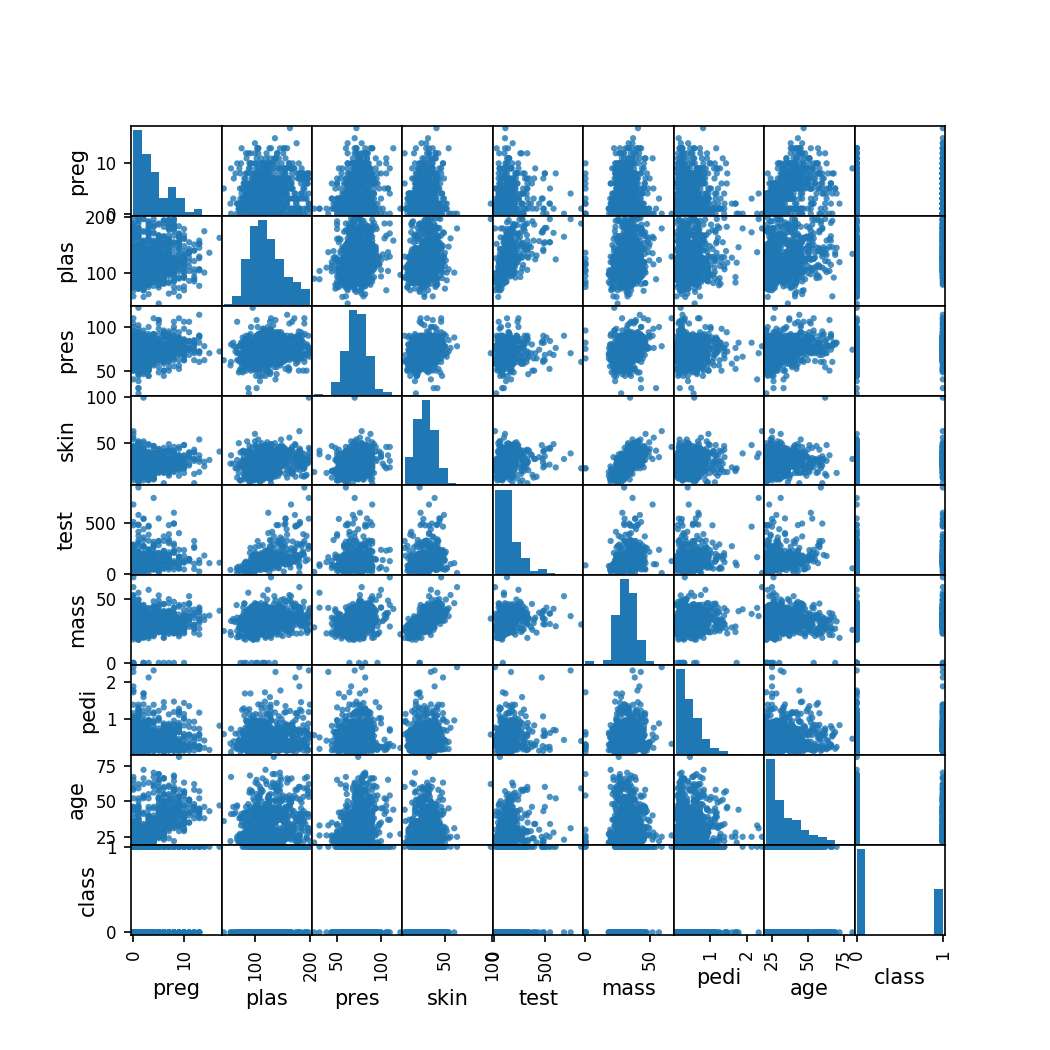

In [18]:
scatter_matrix(df1, alpha=0.8, figsize=(7,7))
plt.show()

Interestingly, the dataset is not randomized. There is a clear relation between ID, which is just an ordered unique identifier, and several of the variables. This is not an issue as long as the dataset is randomized during the train-test selection.



Separating Dataset into predictive and target variables.

Below, code is shown for separating variables into predictive features and the target variable. 

In [52]:
#df2 = df1.dropna
darray = df1.values

X = darray[:,1:8]
Y = darray[:,8]


Next, the data is split into train and test datasets. Here, there is only one split, with 33% of the data being assigned to the test dataset, and 67% of the data being assigned to the train dataset. 


In [53]:
test_size = .33
seed = 10
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size, random_state = seed)

Now, the K-nearest neighbors model will be instantiated, trained, and tested for verification metrics. For this first test, the number of neighbors used will be 7.

In [54]:
model = KNeighborsClassifier(n_neighbors=7)
model.fit(X_train, Y_train)
predicted = model.predict(X_test)



Next, the Accuracy is shown

In [55]:
result = model.score(X_test, Y_test)
print(("Accuracy for K=7: %.3f%%") % (result*100.0))

Accuracy for K=7: 78.462%


Overall, there was an 78.46% accuracy for the model when using K=7. To compare, the accuracy will also be ran with K=2.

In [56]:
model1 = KNeighborsClassifier(n_neighbors=2)
model1.fit(X_train, Y_train)
result1 = model1.score(X_test, Y_test)
print(("Accuracy for K=2: %.3f%%") % (result1*100.0))

Accuracy for K=2: 74.615%


From the above, it can be seen that K=2 gives a 74.5% accuracy

Next, Predictions for input data, [5, 3.2, 4.8, 1.3, 3.4, 2.1, 4.3], and [6, 3.8, 4.0, 2, 1.2, 2.3, 4.6] are shown.

In [57]:
print(model.predict([[5, 3.2, 4.8, 1.3, 3.4, 2.1, 4.3]]))



[ 0.]


In [58]:
print(model.predict([[6, 3.8, 4.0, 2, 1.2, 2.3, 4.6]]))

[ 0.]


Both examples were predicted to be non diabetic

Instead of Using only one split for validation, K-fold cross validation can be used. Here, 10 folds are used, meaning that the dataset will be divided into 10 subsets, and ten models will be trained and tested. The below 10-fold cross validation looks at the validation accuracy obtained from K=7.

In [59]:
n_splits = 10
seed = 8
kfold = KFold(n_splits=n_splits, random_state = seed)
scoring = 'accuracy'
results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring)

print("10 fold Accuracy with K=7: %.3f (%.3f)" % (results.mean(), results.std()))


10 fold Accuracy with K=7: 0.748 (0.092)


Overall, with 10 fold cross validation, the accuracy was 93.3%, with a standard deviation in accuracy among all 10 folds of .079. In contrast, a 10-fold cross validation is performed with K=5 below.

In [60]:
n_splits = 10
seed = 8
kfold = KFold(n_splits=n_splits, random_state = seed)
scoring = 'accuracy'
results1 = cross_val_score(model1, X, Y, cv=kfold, scoring=scoring)

print("10 fold Accuracy with K=5: %.3f (%.3f)" % (results1.mean(), results1.std()))


10 fold Accuracy with K=5: 0.744 (0.105)


Overall, the cross validation scores were very close. The mean accuracies for all folds in the models were identical.  The only difference among them was the standard deviation. There, the model with K=5 had a higher standard deviation. This means that the overall variance in accuracies among the 10 folds is higher with K=5. Since it is usually desirable to use the most consistent predictor, the model with K=7 should usually be preferred among the two models displayed above, as it gives a more consistently accurate score among all test data samples. A predictor with less variance in accuracy gives one more confidence regarding the likelihood of a single given data sample being given an accurate score. 